# Wyznaczanie diagramu Voronoi poprzez triangulację Delaunay'a

In [1]:
from voronoi.visualizer.main import Visualizer
from random import uniform
from voronoi.delaunay.delaunay import *
from voronoi.delaunay.voronoi import *

Implementacje funkcji znajdują się w katalogu [delaunay](voronoi/delaunay). W pliku [delaunay.py](voronoi/delaunay/delaunay.py) znajduje się implementacja algorytmu triangulacji Delaunay'a, a w pliku [voronoi.py](voronoi/delaunay/voronoi.py) wykorzystanie tej triangulacji do wyznaczenia diagramu Voronoi.

W tym pliku znajduje się przykład użycia tych funkcji.

### Dane testowe

In [2]:
def generate_uniform_points(left, right, n=20):
    Points = [None for _ in range(n)]
    for i in range(n):
        xi = uniform(left, right)
        yi = uniform(left, right)
        Points[i] = (xi, yi)
    return Points

In [3]:
Points1 = [(0, 7), (2, 1), (7, 6)]
T1 = delaunay(Points1)

Points2 = [(0, 7), (2, 1), (7, 6), (2, 4), (8.45, -2), (0, 0)]
T2 = delaunay(Points2)

Points3 = generate_uniform_points(-10, 10, n=50)
T3 = delaunay(Points3)

Points4 = generate_uniform_points(-10, 10, n=10)
T4 = delaunay(Points4)

# Przypadki nielubiane przez algorytm
Points5 = [(1, 5), (1, 4), (1, 2), (1, -3), (1, 10)]
T5 = delaunay(Points5)

Points6 = [(-1, -1), (2, 2), (1, 1), (-10, -10), (1.4, 1.4)]
T6 = delaunay(Points6)

Points7 = [(-1, -1), (2, 0)]
T7 = delaunay(Points6)

Points8 = [(-1, 5), (2, 5), (1, 5), (-10, 5), (1.4, 5)]
T8 = delaunay(Points8)

In [4]:
def draw_delaunay(T, Points):
    vis = Visualizer()
    vis.add_point(Points, color='red')
    for edge in T.edges:
        line_segment = ((edge[0].x, edge[0].y), (edge[1].x, edge[1].y))
        vis.add_line_segment(line_segment)
    vis.axis_equal()
    return vis

### Testy - Delaunay

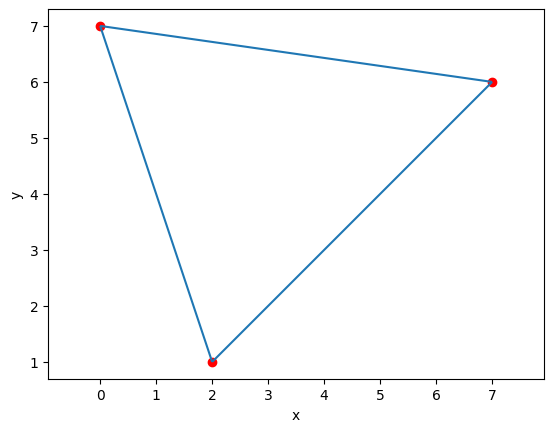

In [5]:
vis1 = draw_delaunay(T1, Points1)
vis1.show()

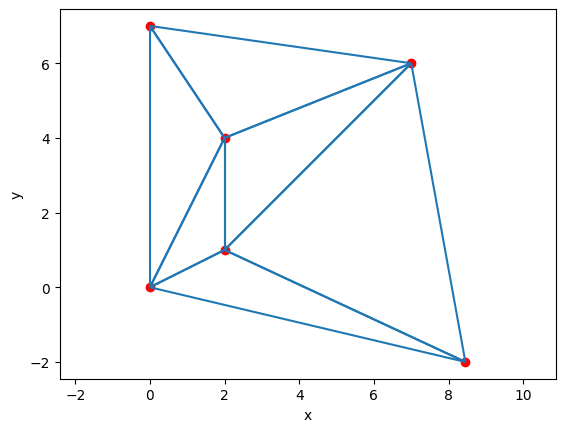

In [6]:
vis2 = draw_delaunay(T2, Points2)
vis2.show()

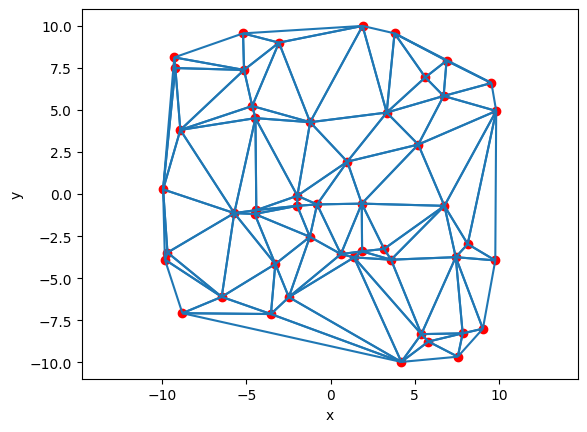

In [7]:
vis3 = draw_delaunay(T3, Points3)
vis3.show()

### Diagram Voronoi

In [8]:
class Voronoi:
    def __init__(self):
        self.edges = set()

### Dane testowe - Voronoi

In [9]:
def draw_voronoi(T, Points):
    edges = voronoi(T, Points)
    vis = Visualizer()
    vis.add_point(Points, color='red')
    for tri in T.triangles:
        if is_in_map(tri.o, T):
            vis.add_point((tri.o.x, tri.o.y), color='blue')
    for edge in edges:
        line_segment = ((edge[0].x, edge[0].y), (edge[1].x, edge[1].y))
        vis.add_line_segment(line_segment)
    vis.axis_equal()
    return vis, edges


def draw_voronoi_with_delaunay(T, Points):
    vis = Visualizer()
    edges = voronoi(T, Points)
    vis.add_point(Points, color='red')
    for edge in T.edges:
        line_segment = ((edge[0].x, edge[0].y), (edge[1].x, edge[1].y))
        vis.add_line_segment(line_segment)
    for tri in T.triangles:
        if is_in_map(tri.o, T):
            vis.add_point((tri.o.x, tri.o.y), color='blue')
    for edge in edges:
        line_segment = ((edge[0].x, edge[0].y), (edge[1].x, edge[1].y))
        vis.add_line_segment(line_segment, color='purple')
    vis.axis_equal()
    return vis


def print_voronoi_edges(edges):
    to_print = []
    for edge in edges:
        to_print.append(((edge[0].x, edge[0].y), (edge[1].x, edge[1].y)))
    print(to_print)


def generate_voronoi(Points):
    T = delaunay(Points)
    vis_voronoi, voronoi_edges = draw_voronoi(T, Points)
    print_voronoi_edges(voronoi_edges)
    vis_voronoi.show()

### Testy - Voronoi

[((3.25, 4.75), (10.0, -2.0)), ((3.25, 4.75), (4.0, 10.0)), ((-3, -2), (10, -2)), ((3.25, 4.75), (-3.0, 2.6666666666666665)), ((10, -2), (10, 10)), ((-3, 10), (-3, -2)), ((10, 10), (-3, 10))]


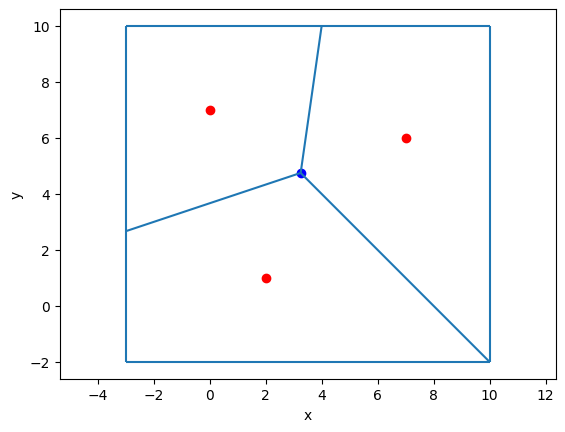

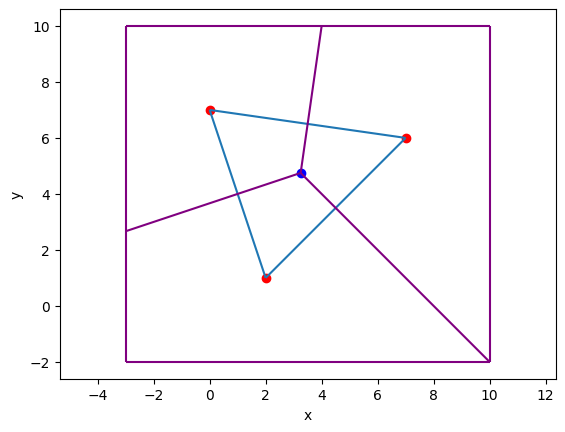

In [10]:
generate_voronoi(Points1)
vis_voronoi_with_delaunay1 = draw_voronoi_with_delaunay(T1, Points1)
vis_voronoi_with_delaunay1.show()

[((-3, -5), (11.45, -5)), ((5.5, 2.5), (0.0, 2.5)), ((11.45, 10), (-3, 10)), ((-3, 10), (-3, -5)), ((6.264682539682539, 1.73531746031746), (3.4298192771084337, -4.3596385542168665)), ((11.45, -5), (11.45, 10)), ((6.264682539682539, 1.73531746031746), (11.45, 2.6751562500000006)), ((3.6052631578947367, 7.2368421052631575), (-2.0, 3.5)), ((3.4298192771084337, -4.3596385542168665), (3.278254437869822, -5.0)), ((-2.0, 3.5), (-3.0, 3.5)), ((0.0, 2.5), (3.4298192771084337, -4.3596385542168665)), ((0.0, 2.5), (-2.0, 3.5)), ((3.6052631578947367, 7.2368421052631575), (5.5, 2.5)), ((6.264682539682539, 1.73531746031746), (5.5, 2.5)), ((3.6052631578947367, 7.2368421052631575), (3.9999999999999996, 10.0))]


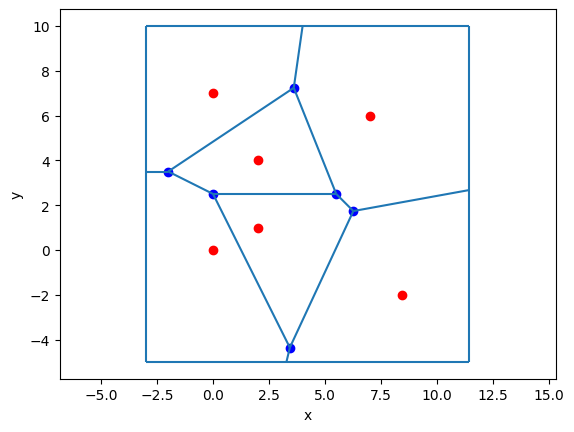

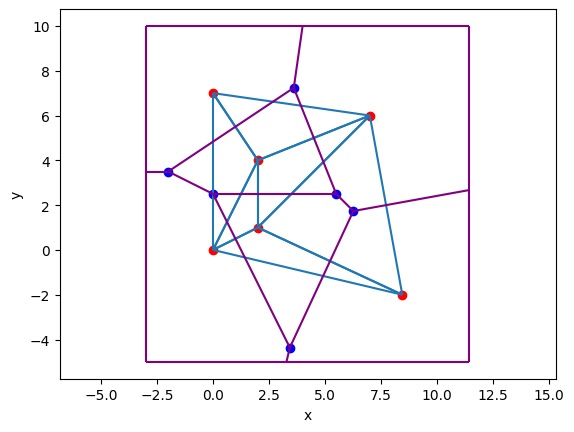

In [11]:
generate_voronoi(Points2)
vis_voronoi_with_delaunay2 = draw_voronoi_with_delaunay(T2, Points2)
vis_voronoi_with_delaunay2.show()

[((0.7628118562556356, 6.8979390280976265), (-0.16767273573713712, 7.4044519554029415)), ((-7.166285803174843, 8.005151762255036), (-12.948338116127868, 7.438519461893756)), ((-7.773420660054015, -4.41765211211684), (-12.948338116127868, -2.509175655886036)), ((7.979164091120343, 6.774920458341808), (8.316536532468415, 5.5305592763662395)), ((-3.9874637830971587, -5.591044088918896), (-4.628714984187808, -5.534619407232638)), ((-0.16767273573713712, 7.4044519554029415), (-2.4419590426343056, 6.512419313366463)), ((-6.715894141041814, 4.296070718483138), (-7.208545660287564, 5.775847497255494)), ((6.604494643162068, -7.580549259688479), (6.576647379880358, -6.107939892652771)), ((6.683739531351551, 6.883523692958641), (5.039299339121895, 5.272548345989193)), ((5.299210124296187, 8.65071371874582), (6.683739531351548, 6.883523692958641)), ((2.606685670146375, -4.082759826974529), (2.375498428342644, -1.9819847545360672)), ((-8.241809709474792, -5.1315704520155405), (-6.202115086500264, -

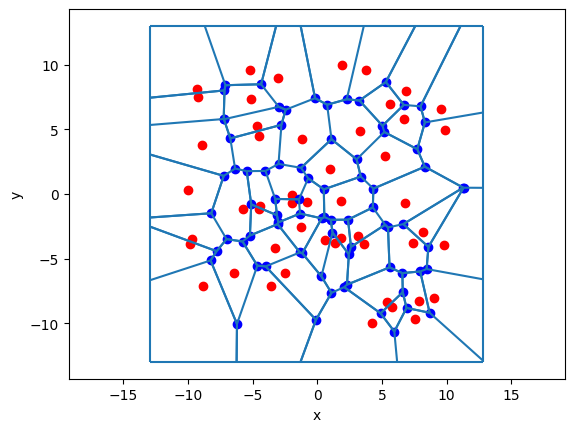

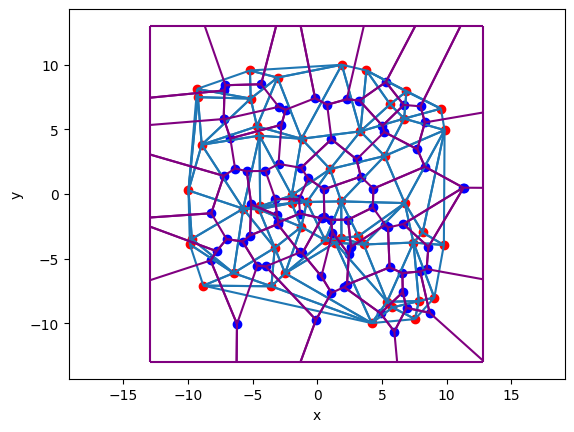

In [12]:
generate_voronoi(Points3)
vis_voronoi_with_delaunay3 = draw_voronoi_with_delaunay(T3, Points3)
vis_voronoi_with_delaunay3.show()

[((10.891268880446878, -2.422920616149423), (12.324830948555611, -2.3114296863575823)), ((1.2327840670099608, 10.589574974363792), (1.4197549239663898, 4.966234158629882)), ((8.80316773899287, 4.038458685574591), (5.723958058016773, 7.445306435063845)), ((-9.610583011120287, 11.726313408188041), (-9.610583011120287, -9.701287138442284)), ((-1.0912444104262102, -1.796319656873379), (0.010002620024115597, -1.3278391775686647)), ((5.723958058016774, 7.4453064350638405), (8.80316773899287, 4.038458685574593)), ((1.4197549239663896, 4.966234158629881), (6.703400271566998, 1.9813427310373875)), ((10.891268880446882, -2.422920616149423), (6.2926297483862, 0.3441141886611074)), ((-1.0912444104262102, -1.796319656873379), (-4.90370219282622, -9.701287138442284)), ((5.723958058016774, 7.4453064350638405), (12.324830948555611, 8.356464715037697)), ((0.010002620024115597, -1.3278391775686649), (2.1816086406968695, -2.0798852095900484)), ((1.4197549239663896, 4.966234158629881), (0.0100026200241155

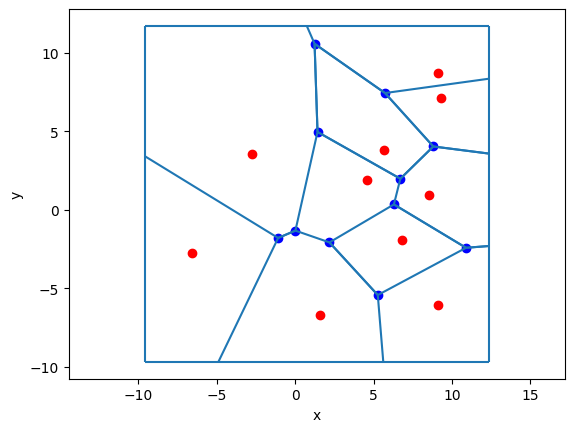

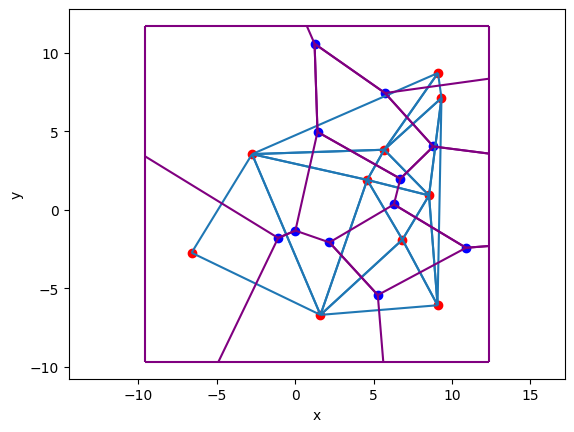

In [13]:
generate_voronoi(Points4)
vis_voronoi_with_delaunay4 = draw_voronoi_with_delaunay(T4, Points4)
vis_voronoi_with_delaunay4.show()

[((4, -6), (4, 13)), ((4.0, 3.0), (-2.0, 3.0)), ((4.0, 7.5), (-2.0, 7.5)), ((4.0, -0.5), (-2.0, -0.5)), ((-2, 13), (-2, -6)), ((4.0, 4.5), (-2.0, 4.5)), ((4, 13), (-2, 13)), ((-2, -6), (4, -6))]


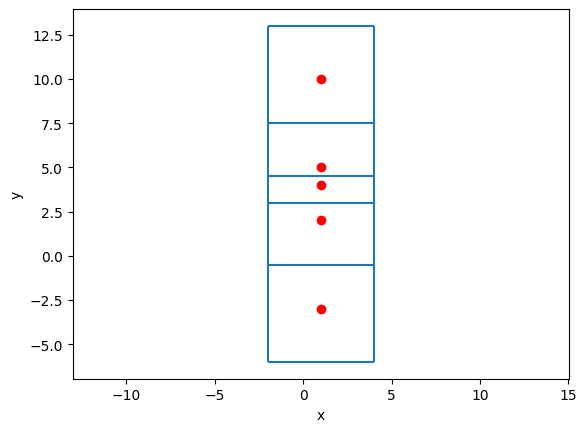

In [14]:
generate_voronoi(Points5)

[((5.0, -2.6000000000000014), (-2.6000000000000014, 5.0)), ((5, -13), (5, 5)), ((5, 5), (-13, 5)), ((5.0, -5.0), (-5.0, 5.0)), ((-13, -13), (5, -13)), ((-13, 5), (-13, -13)), ((5.0, -1.6000000000000014), (-1.5999999999999996, 4.999999999999998)), ((2.0, -13.0), (-13.0, 2.0))]


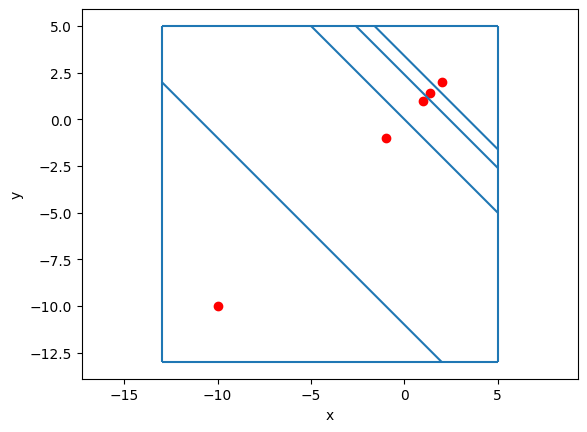

In [15]:
generate_voronoi(Points6)

[((5, -4), (5, 3)), ((5, 3), (-4, 3)), ((-4, 3), (-4, -4)), ((-4, -4), (5, -4)), ((1.666666666666667, -4.0), (-0.666666666666667, 3.0))]


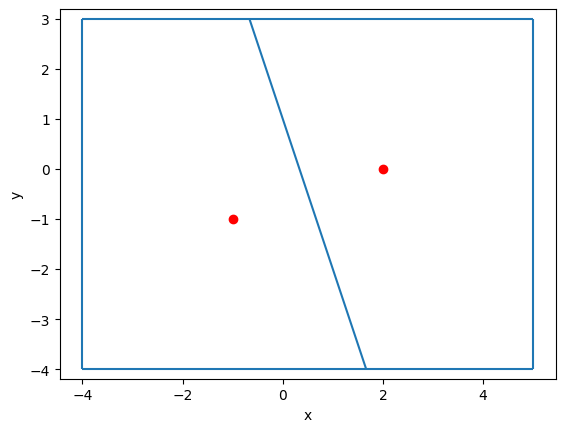

In [16]:
generate_voronoi(Points7)

[((5, 2), (5, 8)), ((5, 8), (-13, 8)), ((-13, 8), (-13, 2)), ((-13, 2), (5, 2)), ((0.0, 2.0), (0.0, 8.0)), ((1.7, 2.0), (1.7, 8.0)), ((-5.5, 2.0), (-5.5, 8.0)), ((1.2, 2.0), (1.2, 8.0))]


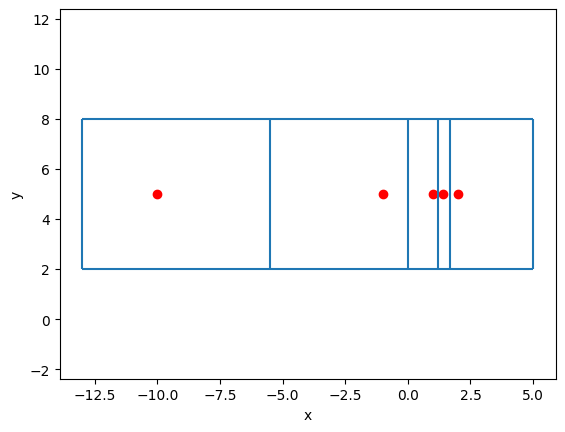

In [17]:
generate_voronoi(Points8)

### Kod do wizualizacji

##### Metody obiektów dostosowane do wizualizacji

In [18]:
global vis

In [19]:
def gif_add_point(self, color='red'):
    vis.add_point((self.x, self.y), color=color)


Point.gif_add_point = gif_add_point

In [20]:
def gif_add_triangle(self, color):
    edges = self.get_edges()
    edges_formatted = []
    for edge in edges:
        edges_formatted.append(
            ((edge[0].x, edge[0].y), (edge[1].x, edge[1].y)))
    return vis.add_line_segment(edges_formatted, color=color)


Triangle.gif_add_triangle = gif_add_triangle

In [21]:
def get_triangulation_start_gif(self, P):
    low_left = Point(float('inf'), float('inf'))
    up_right = Point(float('-inf'), float('-inf'))
    for p in P:
        if p.x < low_left.x:
            low_left.x = p.x
        if p.x > up_right.x:
            up_right.x = p.x
        if p.y < low_left.y:
            low_left.y = p.y
        if p.y > up_right.y:
            up_right.y = p.y
    data_frame = [Point(low_left.x, low_left.y), Point(up_right.x, up_right.y)]
    central_point = Point((low_left.x + up_right.x)/2,
                          (low_left.y + up_right.y)/2 + 1e-2)
    # Z powodu zmniejszania rozmiaru początkowej triangulacji (w celu przedstawienia wizualizacji)
    # możliwe jest niepoprawne wyznaczenie otoczki wypukłej chmury punktów
    low_left.x += -7
    low_left.y += -7
    up_right.x += 7
    up_right.y += 7
    map_vertexes = [low_left, Point(
        up_right.x, low_left.y), up_right, Point(low_left.x, up_right.y)]
    self.triangles.add(
        Triangle(low_left, Point(up_right.x, low_left.y), up_right))
    self.triangles.add(Triangle(low_left, up_right,
                       Point(low_left.x, up_right.y)))
    central_triangle = None
    for tri in self.triangles:
        if central_point in tri:
            central_triangle = tri
        # posortowane
        self.edges[(tri.p1, tri.p2)] = tri.p3
        self.edges[(tri.p2, tri.p3)] = tri.p1
        self.edges[(tri.p3, tri.p1)] = tri.p2
    Triangle(map_vertexes[0], map_vertexes[1],
             map_vertexes[2]).gif_add_triangle(color='skyblue')
    Triangle(map_vertexes[0], map_vertexes[2],
             map_vertexes[3]).gif_add_triangle(color='skyblue')
    return data_frame, map_vertexes, central_point, central_triangle


Triangulation.get_triangulation_start = get_triangulation_start_gif


def adjust_triangulation_gif(self, tri_to_remove, p):
    for tri in tri_to_remove:
        tri.sort_tri_vertexes()
    outer_edges = set()

    for tri in tri_to_remove:
        tri_edges = tri.get_edges()  # set krawędzi trójkąta
        for edge in tri_edges:
            if not ((edge[1], edge[0]) in self.edges):
                outer_edges.add(edge)
            elif not (self.find_adjacent_tri(edge) in tri_to_remove):
                outer_edges.add(edge)

    for tri in tri_to_remove:
        tri.gif_add_triangle('white')
        self.remove(tri)

    added_tri = []
    for edge in outer_edges:
        tri = Triangle(edge[0], edge[1], p)
        tri.sort_tri_vertexes()
        tri.gif_add_triangle('skyblue')
        added_tri.append(tri)
        self.add(tri)

    if self.central_triangle in tri_to_remove:
        for tri in added_tri:
            if self.central_point in tri:
                self.central_triangle = tri


Triangulation.adjust_triangulation = adjust_triangulation_gif


def remove_map_vertexes_gif(self):
    triangles = list(self.triangles)
    for tri in triangles:
        change = False
        if tri.p1 in self.map_vertexes:
            change = True
            vis.add_line_segment((((tri.p1.x, tri.p1.y), (tri.p2.x, tri.p2.y)),
                                  ((tri.p1.x, tri.p1.y), (tri.p3.x, tri.p3.y))), color='white')
        if tri.p2 in self.map_vertexes:
            change = True
            vis.add_line_segment((((tri.p2.x, tri.p2.y), (tri.p1.x, tri.p1.y)),
                                  ((tri.p2.x, tri.p2.y), (tri.p3.x, tri.p3.y))), color='white')
        if tri.p3 in self.map_vertexes:
            change = True
            vis.add_line_segment((((tri.p3.x, tri.p3.y), (tri.p2.x, tri.p2.y)),
                                  ((tri.p3.x, tri.p3.y), (tri.p1.x, tri.p1.y))), color='white')
        if change:
            self.remove(tri)


Triangulation.remove_map_vertexes = remove_map_vertexes_gif

##### Funkcje triangulacji Delaunay'a dostosowane do wizualizacji

In [22]:
def find_containing_gif(T, p):
    curr_tri = T.central_triangle
    delete_yellow_tri = curr_tri.gif_add_triangle('yellow')
    tri_visited = set()
    while True:
        tri_visited.add(curr_tri)
        p1 = curr_tri.p1
        p2 = curr_tri.p2
        p3 = curr_tri.p3
        if mat_det_3x3(p1, p2, p) < 0:
            curr_tri = T.find_adjacent_tri((p1, p2))
            vis.remove_figure(delete_yellow_tri)
            delete_yellow_tri = curr_tri.gif_add_triangle('yellow')
        elif mat_det_3x3(p2, p3, p) < 0:
            curr_tri = T.find_adjacent_tri((p2, p3))
            vis.remove_figure(delete_yellow_tri)
            delete_yellow_tri = curr_tri.gif_add_triangle('yellow')
        elif mat_det_3x3(p3, p1, p) < 0:
            curr_tri = T.find_adjacent_tri((p3, p1))
            vis.remove_figure(delete_yellow_tri)
            delete_yellow_tri = curr_tri.gif_add_triangle('yellow')
        else:
            vis.remove_figure(delete_yellow_tri)
            return curr_tri


def delaunay_gif(Points):
    global vis
    vis = Visualizer()
    P = get_points(Points)
    T = Triangulation(P)

    for p in P:
        p.gif_add_point()
        containing_tri = find_containing_gif(T, p)
        tri_to_remove = []  # trójkąty do usunięcia
        tri_visited = []  # odwiedzone trójkąty
        stack = [containing_tri]

        while len(stack) > 0:
            curr_tri = stack.pop()
            tri_visited.append(curr_tri)

            if curr_tri.in_circle(p):
                tri_to_remove.append(curr_tri)
                curr_tri.gif_add_triangle('orange')
                tri_adjacent = T.find_all_adjacent_tri(
                    curr_tri)  # trójkąty sąsiadujące z curr_tri

                for triangle in tri_adjacent:
                    if triangle not in tri_visited and triangle not in stack:
                        stack.append(triangle)

        T.adjust_triangulation(tri_to_remove, p)

    T.remove_map_vertexes()
    # chwilowe zatrzymanie wizualizacji, gdy przypadek nie jest zdegenerowany:
    if len(T.triangles) != 0:
        for _ in range(5):
            vis.add_line_segment(((T.map_vertexes[0].x, T.map_vertexes[0].y),
                                  ((T.map_vertexes[1].x, T.map_vertexes[1].y))), color='white')
    else:
        for i in range(1, len(P)):
            vis.add_line_segment((Points[i-1], Points[i]), color='white')
    return T, vis

##### Funkcje konstrukcji diagramu Voronoi dostosowane do wizualizacji

In [23]:
def found_adjacent_gif(T, V, triangles_o):
    if is_in_map(triangles_o[0], T) and is_in_map(triangles_o[1], T):
        if not is_added((triangles_o[0], triangles_o[1]), V):
            V.edges.add((triangles_o[0], triangles_o[1]))
            vis.add_line_segment(((triangles_o[0].x, triangles_o[0].y),
                                  (triangles_o[1].x, triangles_o[1].y)), color='purple')

    elif is_in_map(triangles_o[0], T) and not is_in_map(triangles_o[1], T):
        map_edges = [(T.map_vertexes[0], T.map_vertexes[1]), (T.map_vertexes[1], T.map_vertexes[2]),
                     (T.map_vertexes[2], T.map_vertexes[3]), (T.map_vertexes[3], T.map_vertexes[0])]
        for map_edge in map_edges:
            intersection_point = check_intersection(
                (triangles_o[0], triangles_o[1]), map_edge)
            if intersection_point:
                V.edges.add((triangles_o[0], intersection_point))
                vis.add_line_segment(((triangles_o[0].x, triangles_o[0].y),
                                      (intersection_point.x, intersection_point.y)), color='purple')
                break

    elif not is_in_map(triangles_o[0], T) and is_in_map(triangles_o[1], T):
        map_edges = [(T.map_vertexes[0], T.map_vertexes[1]), (T.map_vertexes[1], T.map_vertexes[2]),
                     (T.map_vertexes[2], T.map_vertexes[3]), (T.map_vertexes[3], T.map_vertexes[0])]
        for map_edge in map_edges:
            intersection_point = check_intersection(
                (triangles_o[0], triangles_o[1]), map_edge)
            if intersection_point:
                V.edges.add((triangles_o[1], intersection_point))
                vis.add_line_segment(((triangles_o[1].x, triangles_o[1].y),
                                      (intersection_point.x, intersection_point.y)), color='purple')
                break

    elif not is_in_map(triangles_o[0], T) and not is_in_map(triangles_o[1], T):
        map_edges = [(T.map_vertexes[0], T.map_vertexes[1]), (T.map_vertexes[1], T.map_vertexes[2]),
                     (T.map_vertexes[2], T.map_vertexes[3]), (T.map_vertexes[3], T.map_vertexes[0])]
        intersection_points = []
        for map_edge in map_edges:
            intersection_point = check_intersection(
                (triangles_o[0], triangles_o[1]), map_edge)
            if intersection_point:
                intersection_points.append(intersection_point)
        if len(intersection_points) == 2:
            V.edges.add((intersection_points[0], intersection_points[1]))
            vis.add_line_segment(((intersection_points[0].x, intersection_points[0].y),
                                  (intersection_points[1].x, intersection_points[1].y)), color='purple')


found_adjacent = found_adjacent_gif


def not_found_adjacent_gif(T, V, triangle_edge, triangle):
    map_edges = [(T.map_vertexes[0], T.map_vertexes[1]), (T.map_vertexes[1], T.map_vertexes[2]),
                 (T.map_vertexes[2], T.map_vertexes[3]), (T.map_vertexes[3], T.map_vertexes[0])]
    if triangle.o in triangle:
        parallel_line = get_parallel_line(triangle_edge, triangle.o)
        for map_edge in map_edges:
            intersection_point = check_intersection(parallel_line, map_edge)
            if intersection_point:
                V.edges.add((triangle.o, intersection_point))
                vis.add_line_segment(((triangle.o.x, triangle.o.y),
                                      (intersection_point.x, intersection_point.y)), color='purple')
                break
    else:
        if mat_det_3x3(triangle_edge[0], triangle_edge[1], triangle.o) < 0:
            opposite_parallel_line = get_opposite_parallel_line(
                triangle_edge, triangle.o)
            for map_edge in map_edges:
                intersection_point = check_intersection(
                    opposite_parallel_line, map_edge)
                if intersection_point:
                    V.edges.add((triangle.o, intersection_point))
                    vis.add_line_segment(((triangle.o.x, triangle.o.y),
                                          (intersection_point.x, intersection_point.y)), color='purple')
                    break
        else:
            parallel_line = get_parallel_line(triangle_edge, triangle.o)
            intersection_points = []
            for map_edge in map_edges:
                intersection_point = check_intersection(
                    parallel_line, map_edge)
                if intersection_point:
                    intersection_points.append(intersection_point)
            if len(intersection_points) == 1:
                V.edges.add((triangle.o, intersection_points[0]))
                vis.add_line_segment(((triangle.o.x, triangle.o.y),
                                      (intersection_points[0].x, intersection_points[0].y)), color='purple')
            elif len(intersection_points) == 2:
                V.edges.add((intersection_points[0], intersection_points[1]))
                vis.add_line_segment(((intersection_points[0].x, intersection_points[0].y),
                                      (intersection_points[1].x, intersection_points[1].y)), color='purple')


not_found_adjacent = not_found_adjacent_gif


def add_edgeV_no_triangles_gif(V, edge, map_edges):
    x1 = edge[0].x
    y1 = edge[0].y
    x2 = edge[1].x
    y2 = edge[1].y
    left_x = map_edges[0][0].x - 1
    right_x = map_edges[0][1].x + 1
    if x1 == x2:
        new_y = (y1 + y2)/2
        line = (Point(left_x, new_y), Point(right_x, new_y))
        intersection_points = [None for _ in range(2)]
        intersection_points[0] = check_intersection(line, map_edge[1])
        intersection_points[1] = check_intersection(line, map_edge[3])
        V.edges.add((intersection_points[0], intersection_points[1]))
        vis.add_line_segment(((intersection_points[0].x, intersection_points[0].y),
                              (intersection_points[1].x, intersection_points[1].y)), color='purple')
    elif y1 == y2:
        down_y = map_edges[0][0].y - 1
        up_y = map_edges[1][1].y + 1
        new_x = (x1 + x2)/2
        line = (Point(new_x, down_y), Point(new_x, up_y))
        intersection_points = [None for _ in range(2)]
        intersection_points[0] = check_intersection(line, map_edge[0])
        intersection_points[1] = check_intersection(line, map_edge[2])
        V.edges.add((intersection_points[0], intersection_points[1]))
        vis.add_line_segment(((intersection_points[0].x, intersection_points[0].y),
                              (intersection_points[1].x, intersection_points[1].y)), color='purple')
    else:
        a = -1 / ((y2 - y1) / (x2 - x1))
        b = ((y1 + y2)/2) - (a * ((x1 + x2)/2))
        line = (Point(left_x, a*left_x + b), Point(right_x, a*right_x + b))
        intersection_points = []
        for map_edge in map_edges:
            intersection_point = check_intersection(line, map_edge)
            if intersection_point:
                intersection_points.append(intersection_point)
        V.edges.add((intersection_points[0], intersection_points[1]))
        vis.add_line_segment(((intersection_points[0].x, intersection_points[0].y),
                              (intersection_points[1].x, intersection_points[1].y)), color='purple')


add_edgeV_no_triangles = add_edgeV_no_triangles_gif

# Funkcja dodająca krawędź pomiędzy triangle i drugim trójkątem o krawędzi triangle_edge (o ile istnieje)


def add_edgeV_gif(T, V, triangle_edge, triangle):
    triangle.gif_add_triangle('palegreen')
    triangles_o = get_triangles_o(triangle, triangle_edge, T)
    if len(triangles_o) == 2:
        found_adjacent(T, V, triangles_o)
    elif len(triangles_o) == 1:
        not_found_adjacent(T, V, triangle_edge, triangle)


add_edgeV = add_edgeV_gif


def voronoi_gif(Points):
    V = Voronoi()
    global vis
    T, vis = delaunay_gif(Points)

    map_edges = [(T.map_vertexes[0], T.map_vertexes[1]), (T.map_vertexes[1], T.map_vertexes[2]),
                 (T.map_vertexes[2], T.map_vertexes[3]), (T.map_vertexes[3], T.map_vertexes[0])]
    vis.add_point(Points, color='red')
    for edge in map_edges:
        vis.add_line_segment(
            ((edge[0].x, edge[0].y), (edge[1].x, edge[1].y)), color='purple')
    for tri in T.triangles:
        if is_in_map(tri.o, T):
            vis.add_point((tri.o.x, tri.o.y), color='purple')

    for triangle in T.triangles:
        add_edgeV(T, V, (triangle.p1, triangle.p2), triangle)
        add_edgeV(T, V, (triangle.p2, triangle.p3), triangle)
        add_edgeV(T, V, (triangle.p3, triangle.p1), triangle)

    if len(T.triangles) == 0:
        no_triangles(T, V, Points)

    for edge in map_edges:
        V.edges.add(edge)

    # chwilowe zatrzymanie wizualizacji:
    for i in range(20):
        for edge in map_edges:
            vis.add_line_segment(
                ((edge[0].x, edge[0].y), (edge[1].x, edge[1].y)), color='purple')
    return vis

###  Przykłady wizualizacji

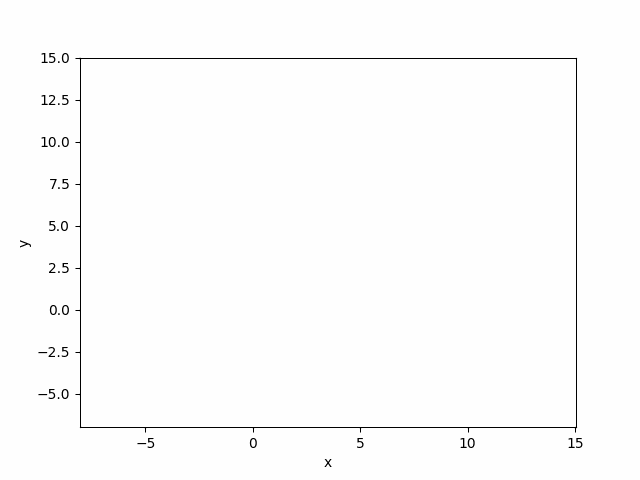

In [24]:
Points1 = [(0, 7), (2, 1), (7, 6)]
vis1 = voronoi_gif(Points1)
vis1.show_gif(interval=1000)

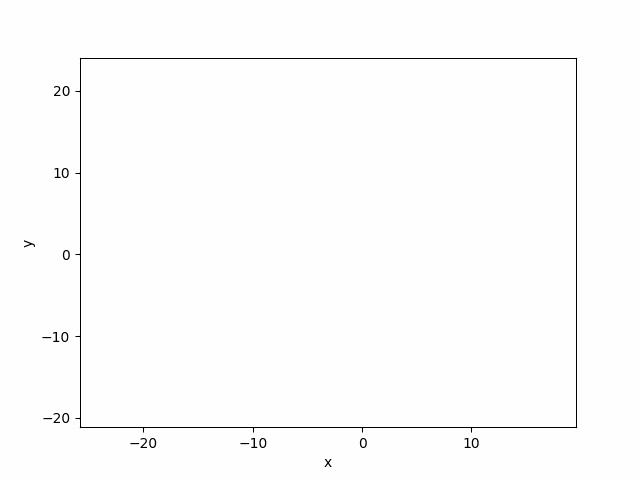

In [25]:
Points4 = generate_uniform_points(-20, 20, n=10)
vis4 = voronoi_gif(Points4)
vis4.show_gif()

In [26]:
vis4 = voronoi_gif(Points6)
vis4.show_gif()